# Application Review

### 225HP @ 2200

In [22]:
import numpy as np
import scipy
import scipy.fftpack
from nptdms import tdms
import matplotlib.pyplot as plt

from acoustics import Signal
from acoustics.standards.iec_61672_1_2013 import (NOMINAL_OCTAVE_CENTER_FREQUENCIES,
                                                  NOMINAL_THIRD_OCTAVE_CENTER_FREQUENCIES)
import sig

%matplotlib inline

### Path to TDMS file:

In [23]:
tdmspath = "./TDMS/vib.tdms"

### Setup Data Structures and Perform Standard calculations

In [24]:
#create an instance of tdms data from the specified TDMS file
tdfile = tdms.TdmsFile(tdmspath)

'''
for channel in tdfile.group_channels('Vibration'):
    print(channel.properties)
    print("\n")
'''

'\nfor channel in tdfile.group_channels(\'Vibration\'):\n    print(channel.properties)\n    print("\n")\n'

In [25]:
vib_channels = tdfile.group_channels('Vibration')
print(vib_channels[0].raw_data.shape)

#for channel in vib_channels:
#    print(channel.properties)

(145061,)


In [26]:
data = tdfile.channel_data('Vibration', 'DOC X')
data
dataProp = tdfile.group_channels('Vibration')[0].properties
DOCSensitivity = float(dataProp['Sensor Sensitivity (mV/EU)'])
DOCSensitivity
gData = (data * 1000 / DOCSensitivity)

### Plot overall Run.  Look at index at bottom for more detailed plot in next cell.

In [27]:
#df = tdfile.as_dataframe()
#df.plot(figsize=(12,24), color=('r'), subplots=True );

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


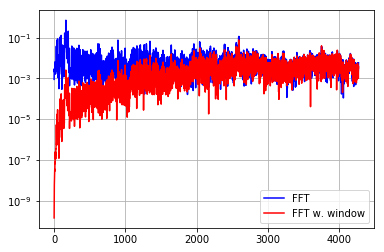

In [28]:
#Convert Data to correct units.  
    #Apply the channel sensitivity.
N = 8192
T = 1/8533.3333
yf = scipy.fft(gData[1:8192])
w = scipy.hanning(N)
ywf = (scipy.fft(gData[:8192])*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

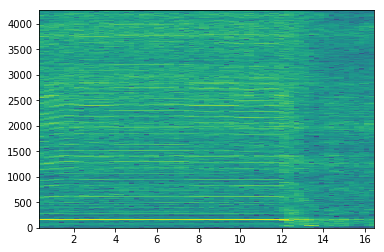

In [29]:
#Window The Data

plt.specgram(gData, NFFT=8192, Fs=8533.3333, Fc=None, detrend=None, window=np.hanning(8192), mode='psd', noverlap=6144, pad_to=None, scale='dB' )
plt.show()

In [30]:
s = Signal(gData, fs=8533)

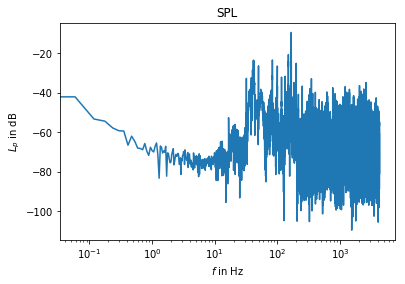

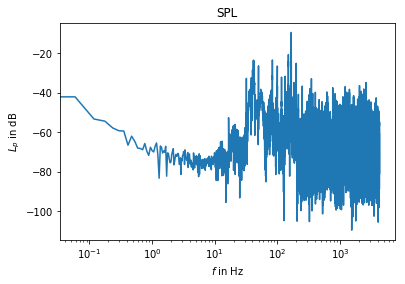

In [31]:
s.plot_power_spectrum(reference=1.0)

In [32]:
win = np.hanning(8192)
print(win)
sx = np.array(s)

[0.00000000e+00 1.47104471e-07 5.88417797e-07 ... 5.88417797e-07
 1.47104471e-07 0.00000000e+00]


In [33]:
x = sig.apply_window(sx, win)
x.shape

(139264,)

In [41]:
octdata = sig.octaves(x, s.fs, density=False, frequencies=NOMINAL_OCTAVE_CENTER_FREQUENCIES, ref=1.0)
print(octdata)

(OctaveBand([   15.84893192    31.6227766     63.09573445   125.89254118
   251.18864315   501.18723363  1000.          1995.26231497
  3981.07170553  7943.28234724 15848.93192461]), array([-41.46779168, -11.83539652, -16.76413096,  -3.37478567,
       -16.32864745, -21.10415908, -15.4478493 , -11.23597198,
       -14.5827846 ,         -inf,         -inf]))


/home/jack/work/git/appreview/Vibration/sig.py:899: RuntimeWarning: divide by zero encountered in log10
  level = 10.0*np.log10(power / ref**2.0)
